In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import plot_importance

In [179]:
df = pd.read_csv('C:/Users/gangl/Documents/Python Scripts/SolarPowerData.csv')

In [180]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [181]:
print(f'The data frame has {df.shape[0] } rows and {df.shape[1]} columns')

The data frame has 8760 rows and 8 columns


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [183]:
df["Radiation"] = df["Radiation"] + abs(df["Radiation"].min())

In [184]:
df.head(24)

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,1.9,0.1,97,0.0000
1,01.01.2017-01:00,1.7,0,1003.5,1.9,-0.2,98,0.0000
2,01.01.2017-02:00,0.6,0,1003.4,2.6,-1.2,99,0.0000
3,01.01.2017-03:00,2.4,0,1003.3,2.1,-1.3,99,0.0000
4,01.01.2017-04:00,4.0,0,1003.1,3.0,3.6,67,0.0000
5,01.01.2017-05:00,1.4,0,1003.1,2.5,1.5,74,0.0000
6,01.01.2017-06:00,1.4,0,1003.7,2.3,0.4,79,0.0000
7,01.01.2017-07:00,1.3,0,1003.9,2.3,-0.9,81,0.0000
8,01.01.2017-08:00,0.6,0,1004.3,2.7,-1.0,77,0.0000
9,01.01.2017-09:00,0.6,0,1004.8,2.8,-2.0,81,0.0000


In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WindSpeed,8760.0,2.639823,1.628754,0.0,1.4,2.3,3.60000,10.9
Sunshine,8760.0,11.180479,21.171295,0.0,0.0,0.0,7.00000,60.0
AirPressure,8760.0,1010.361781,12.793971,965.9,1002.8,1011.0,1018.20000,1047.3
Radiation,8760.0,106.838493,182.336029,0.0,3.1,7.9,124.90000,909.0
AirTemperature,8760.0,6.978893,7.604266,-12.4,0.5,6.4,13.40000,27.1
RelativeAirHumidity,8760.0,76.719406,19.278996,13.0,64.0,82.0,93.00000,100.0
SystemProduction,8760.0,684.746071,1487.454665,0.0,0.0,0.0,464.24995,7701.0


In [186]:
df.rename(columns = {'Date-Hour(NMT)' : 'Datetime'}, inplace = True)

In [187]:
df.head(5)

,Datetime,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,1.9,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,1.9,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,2.6,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,2.1,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,3.0,3.6,67,0.0


In [188]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='mixed', dayfirst = True)

In [189]:
df.head(5)

,Datetime,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,2017-01-01 00:00:00,0.6,0,1003.8,1.9,0.1,97,0.0
1,2017-01-01 01:00:00,1.7,0,1003.5,1.9,-0.2,98,0.0
2,2017-01-01 02:00:00,0.6,0,1003.4,2.6,-1.2,99,0.0
3,2017-01-01 03:00:00,2.4,0,1003.3,2.1,-1.3,99,0.0
4,2017-01-01 04:00:00,4.0,0,1003.1,3.0,3.6,67,0.0


In [190]:
df.set_index('Datetime')

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Datetime,,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,1.9,0.1,97,0.0
2017-01-01 01:00:00,1.7,0,1003.5,1.9,-0.2,98,0.0
2017-01-01 02:00:00,0.6,0,1003.4,2.6,-1.2,99,0.0
2017-01-01 03:00:00,2.4,0,1003.3,2.1,-1.3,99,0.0
2017-01-01 04:00:00,4.0,0,1003.1,3.0,3.6,67,0.0
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,4.1,0,988.2,4.5,-0.7,94,0.0
2017-12-31 20:00:00,2.1,0,987.3,4.3,-0.3,95,0.0
2017-12-31 21:00:00,1.8,0,986.7,4.0,0.2,93,0.0


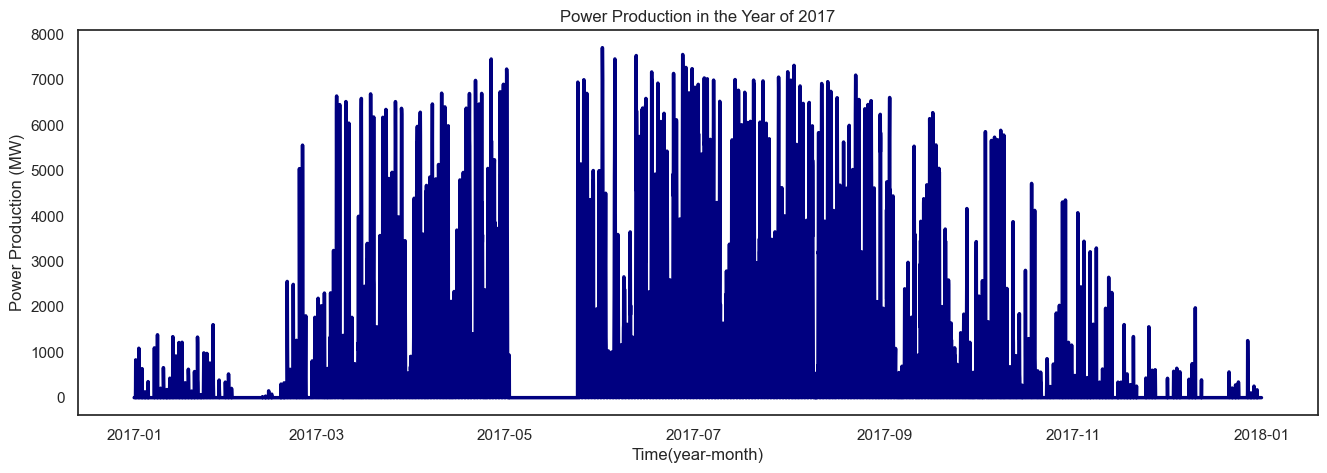

In [191]:
sns.set()
sns.set_style("white")
plt.figure(figsize=(16, 5))
sns.lineplot(x = 'Datetime',
            y = 'SystemProduction',
            data = df, linewidth = 2.5, color = 'navy')
plt.xlabel('Time(year-month)')
plt.ylabel('Power Production (MW)')
plt.title('Power Production in the Year of 2017')
plt.savefig("How Power Production Changes in the Year of 2017.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.show()

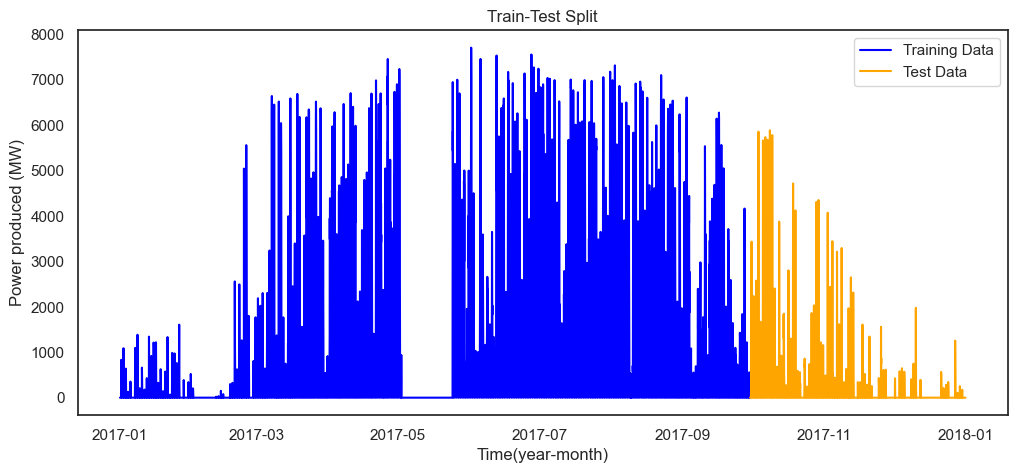

In [192]:
sns.set()
sns.set_style("white")
train = df.loc[df['Datetime'] < '2017-09-30']
test = df.loc[df['Datetime'] >= '2017-09-30']

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x = 'Datetime', y = 'SystemProduction', data = train,color="blue", label='Training Data')
sns.lineplot(x = 'Datetime', y = 'SystemProduction', data = test,color="orange", label='Test Data')

plt.title('Train-Test Split')
plt.ylabel('Power produced (MW)')
plt.savefig("Training Test Split.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.xlabel('Time(year-month)')
plt.show()

Text(0.5, 0, 'Time(year-month-day)')

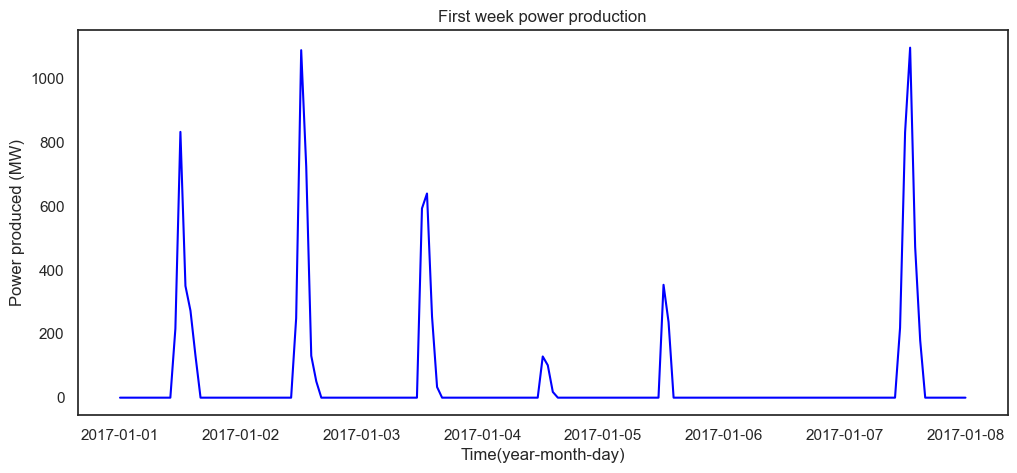

In [193]:
_ = df.loc[df['Datetime'] <= '2017-01-08']
plt.subplots(figsize=(12, 5))
sns.lineplot(x = _['Datetime'], y = 'SystemProduction', data = _,color='blue')
plt.title('First week power production')
plt.ylabel('Power produced (MW)')
plt.xlabel('Time(year-month-day)')

In [194]:
df['hour'] = df['Datetime'].dt.hour
df['month'] = df['Datetime'].dt.month

In [195]:
df.head()

,Datetime,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,hour,month
0,2017-01-01 00:00:00,0.6,0,1003.8,1.9,0.1,97,0.0,0,1
1,2017-01-01 01:00:00,1.7,0,1003.5,1.9,-0.2,98,0.0,1,1
2,2017-01-01 02:00:00,0.6,0,1003.4,2.6,-1.2,99,0.0,2,1
3,2017-01-01 03:00:00,2.4,0,1003.3,2.1,-1.3,99,0.0,3,1
4,2017-01-01 04:00:00,4.0,0,1003.1,3.0,3.6,67,0.0,4,1


In [196]:
df.tail()

,Datetime,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,hour,month
8755,2017-12-31 19:00:00,4.1,0,988.2,4.5,-0.7,94,0.0,19,12
8756,2017-12-31 20:00:00,2.1,0,987.3,4.3,-0.3,95,0.0,20,12
8757,2017-12-31 21:00:00,1.8,0,986.7,4.0,0.2,93,0.0,21,12
8758,2017-12-31 22:00:00,2.2,0,986.0,3.9,0.3,92,0.0,22,12
8759,2017-12-31 23:00:00,2.4,0,985.6,3.4,0.4,96,0.0,23,12


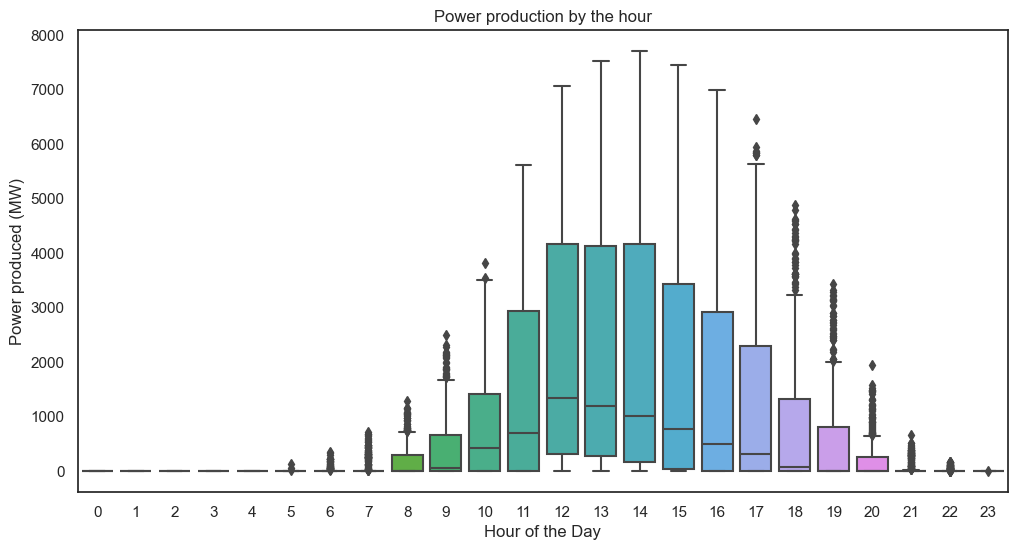

In [219]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x = 'hour',
           y = 'SystemProduction',
           data = df)
plt.ylabel('Power produced (MW)')
plt.xlabel('Hour of the Day')
plt.title('Power production by the hour')
plt.savefig("By hour.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.show()

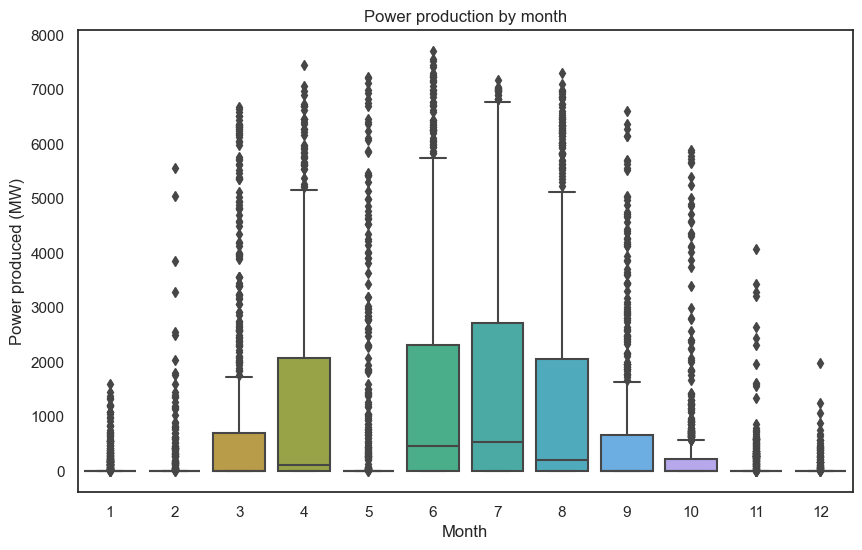

In [217]:
sns.set()
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x = 'month',
           y = 'SystemProduction',
           data = df)
plt.ylabel('Power produced (MW)')
plt.xlabel('Month')
plt.title('Power production by month')
plt.savefig("By month.png", dpi=300, bbox_inches="tight")  # High-quality image
plt.show()

In [199]:
train = df.loc[df['Datetime'] < '2017-10-01']
test = df.loc[df['Datetime']  >= '2017-10-01']

X_train = train.drop(columns = ['SystemProduction','hour','month','Datetime'])
y_train = train['SystemProduction']

# test dataframe
X_test = test.drop(columns = ['SystemProduction','hour','month','Datetime'])
y_test = test['SystemProduction']

X_train.dtypes

WindSpeed              float64
Sunshine                 int64
AirPressure            float64
Radiation              float64
AirTemperature         float64
RelativeAirHumidity      int64
dtype: object

In [200]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6552 entries, 0 to 6551
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            6552 non-null   float64
 1   Sunshine             6552 non-null   int64  
 2   AirPressure          6552 non-null   float64
 3   Radiation            6552 non-null   float64
 4   AirTemperature       6552 non-null   float64
 5   RelativeAirHumidity  6552 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 358.3 KB


In [201]:
parameters = {'n_estimators': [5, 10, 100, 1000],
             'max_depth': [2, 4, 6, 8],
             'learning_rate': [0.01, 0.1, 1],
              'max_leaves': [2, 4, 6, 8]
             }

In [202]:
model = XGBRegressor()
clf = GridSearchCV(model, parameters, n_jobs = 5, scoring = 'neg_mean_squared_error')

In [203]:
clf.fit(X_train, y_train) 

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 4, 6, 8], 'max_leaves': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [204]:
print('best parameters: ', clf.best_params_)
print('best score: ', clf.best_score_)

best parameters:  {'learning_rate': 0.01, 'max_depth': 2, 'max_leaves': 2, 'n_estimators': 1000}
best score:  -1195586.6237629738


In [205]:
parameters = {'learning_rate': [0.01], 
              'max_depth': [2], 
              'max_leaves': [2], 
              'n_estimators': [1000]}
model = XGBRegressor()
clf = GridSearchCV(model, parameters, n_jobs = 5, scoring = 'neg_mean_squared_error')
clf.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.01], 'max_depth': [2],
                         'max_leaves': [2], 'n_estimators': [1000]},
             scoring='neg_mean_squared_error')

In [206]:
y_preds = clf.predict(X_test)

In [207]:
print(mean_absolute_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)
print(f"R² (r2_score method): {r2:.4f}")

171.08667640397718
R² (r2_score method): 0.5582


In [208]:
reg = XGBRegressor(learning_rate= 0.01, 
              max_depth= 2, 
              max_leaves = 2, 
              n_estimators = 1000)
reg.fit(X_train, y_train)
print(reg.feature_importances_)

[0.02523183 0.01686458 0.02301689 0.62709194 0.24484503 0.06294972]


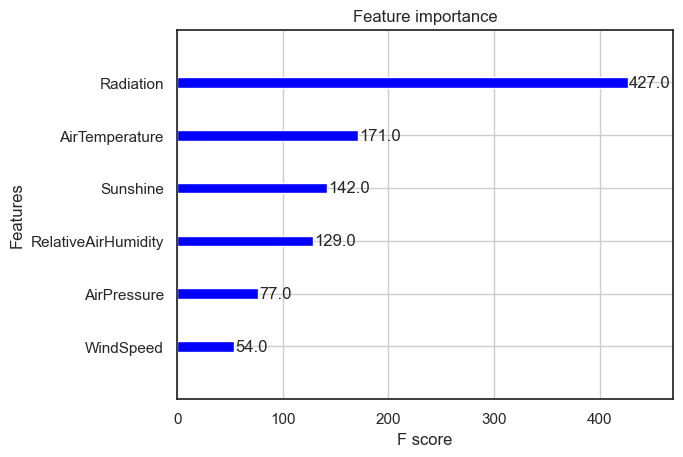

In [221]:
plot_importance(reg,color='blue')
plt.savefig("Feature Importance.png", dpi=300, bbox_inches="tight") 
plt.show()

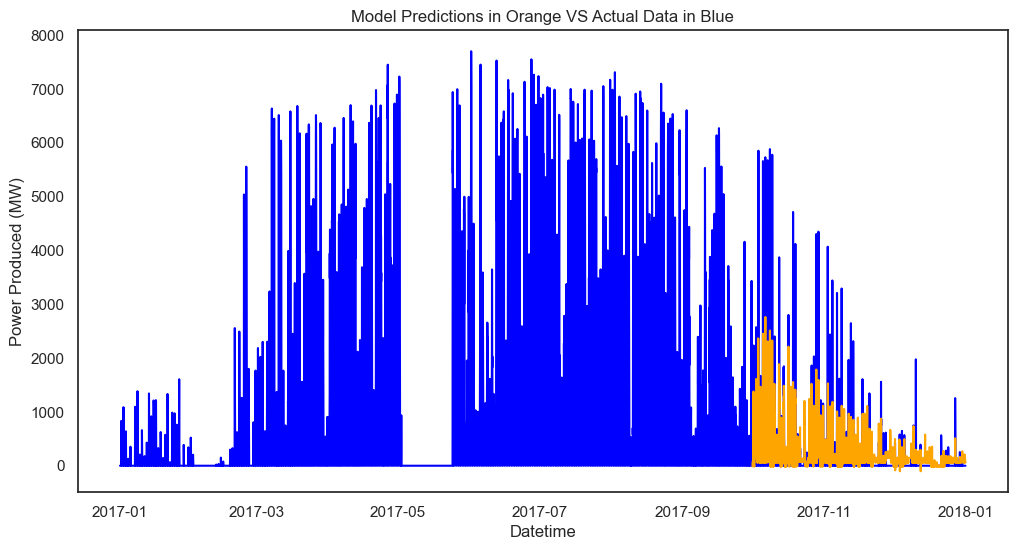

In [212]:
sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.lineplot(x = df['Datetime'], y = 'SystemProduction', data=df, color = 'blue') #test data 
sns.lineplot(x = test['Datetime'], y = y_preds, color = 'orange') # predictions
plt.title('Model Predictions in Orange VS Actual Data in Blue')
plt.ylabel('Power Produced (MW)')
plt.xlabel('Datetime')
plt.savefig("Model Prediction.png", dpi=300, bbox_inches="tight") 
plt.show()

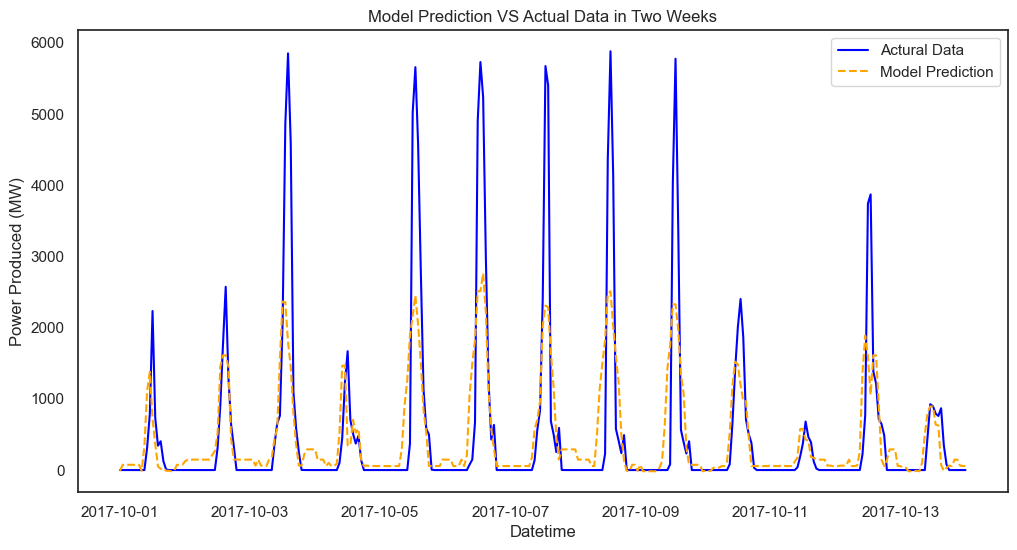

In [220]:
# making a copy of test set
test_copy = test.copy()


# adding predictions to the dataframe
test_copy['predictions'] = y_preds


# slicing a week of the data set
fw = test_copy.loc[(test_copy['Datetime'] <= '2017-10-14')]


# Plotting

sns.set()
sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.lineplot(data = fw, x = fw['Datetime'], y='SystemProduction', color = 'blue',label = 'Actural Data') # actual values
sns.lineplot(data = fw, x = fw['Datetime'], y = 'predictions', color = 'orange', linestyle = 'dashed',label = 'Model Prediction') # predicted values
plt.title('Model Prediction VS Actual Data in Two Weeks')
plt.ylabel('Power Produced (MW)')
plt.xlabel('Datetime')
plt.savefig("Model Prediction VS Actual Data in Two Weeks.png", dpi=300, bbox_inches="tight") 
plt.show()

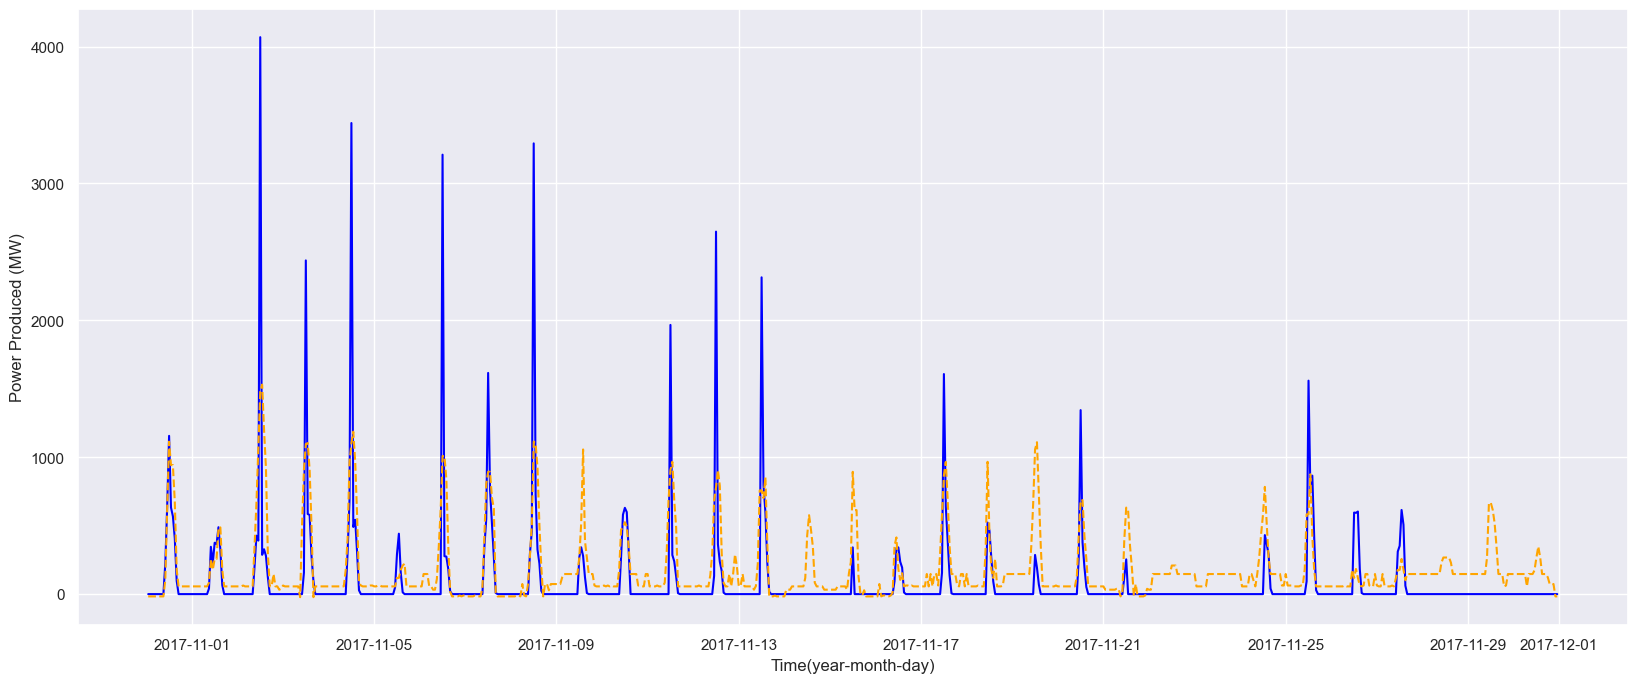

In [139]:
# slicing a week of the data set
fm = test_copy.loc[(test_copy['Datetime'] > '2017-10-31') & (test_copy['Datetime'] < '2017-12-01')]


# Plotting

sns.set()
plt.figure(figsize=(20, 8))
sns.lineplot(data = fm, x = fm['Datetime'], y='SystemProduction', color = 'blue') # actual values
sns.lineplot(data = fm, x = fm['Datetime'], y = 'predictions', color = 'orange', linestyle = 'dashed') # predicted values
plt.ylabel('Power Produced (MW)')
plt.xlabel('Time(year-month-day)')
plt.show()

In [140]:
# test_copy.loc[(test_copy['Datetime'] > '2017-11-16') & (test_copy['Datetime'] < '2017-11-17'), ('SystemProduction', 'predictions')]

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [142]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Print intercept and coefficients
print(f"Intercept (b0): {intercept:.2f}")
for feature, coef in zip(X_train.columns, coefficients):
    print(f"Coefficient for {feature}: {coef:.2f}")

Intercept (b0): 8634.81
Coefficient for WindSpeed: 27.48
Coefficient for Sunshine: -11.08
Coefficient for AirPressure: -7.81
Coefficient for Radiation: 6.40
Coefficient for AirTemperature: 11.95
Coefficient for RelativeAirHumidity: -9.98


In [143]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

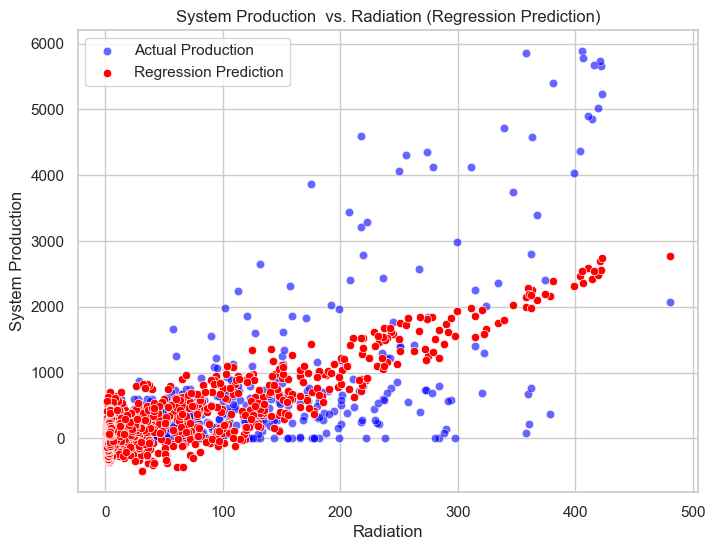

In [101]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=X_test['Radiation'], y=y_test, label="Actual Production", color="blue", alpha=0.6)
sns.scatterplot(x=X_test['Radiation'], y=model.predict(X_test), color="red", label="Regression Prediction")

# Labels and title
plt.xlabel("Radiation")
plt.ylabel("System Production")
plt.title("System Production  vs. Radiation (Regression Prediction)")
plt.legend()
plt.show()

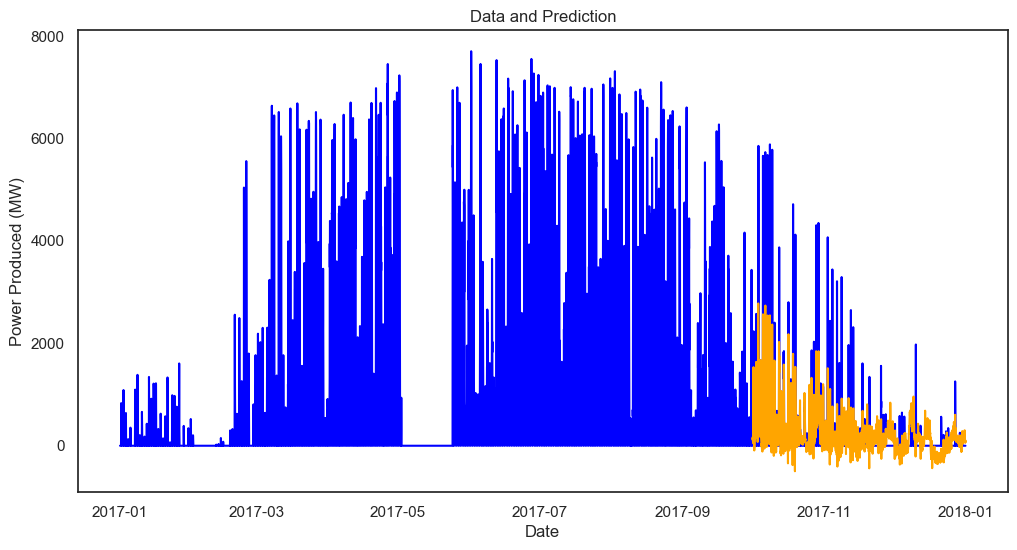

In [145]:
sns.set_style("white")
plt.figure(figsize=(12, 6))
sns.lineplot(x = df['Datetime'], y = 'SystemProduction', data=df, color = 'blue') #test data 
sns.lineplot(x = test['Datetime'], y = y_pred, color = 'orange') # predictions
plt.title('Data and Prediction')
plt.ylabel('Power Produced (MW)')
plt.xlabel('Date')
plt.show()

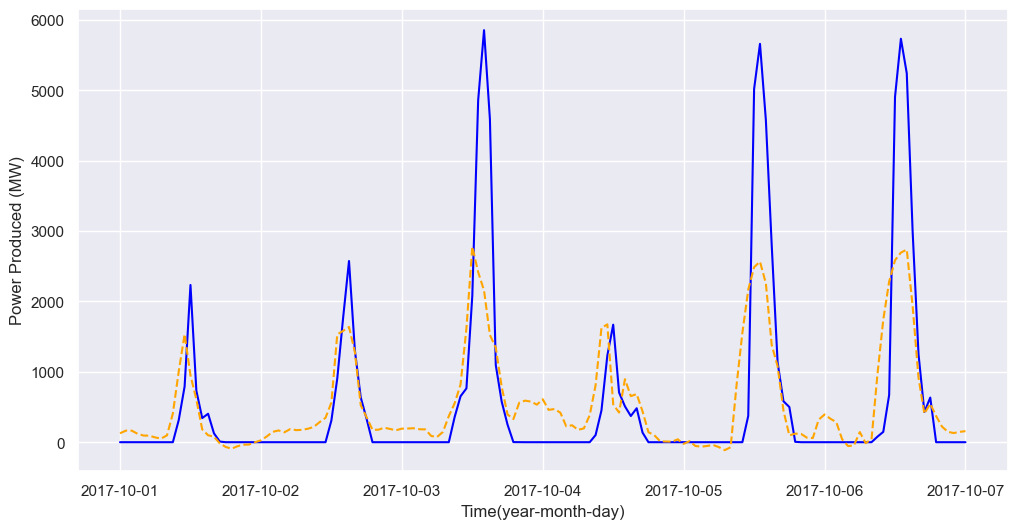

In [146]:
# making a copy of test set
test_copy = test.copy()


# adding predictions to the dataframe
test_copy['predictions'] = y_pred


# slicing a week of the data set
fw = test_copy.loc[(test_copy['Datetime'] <= '2017-10-07')]


# Plotting

sns.set()
plt.figure(figsize=(12, 6))
sns.lineplot(data = fw, x = fw['Datetime'], y='SystemProduction', color = 'blue') # actual values
sns.lineplot(data = fw, x = fw['Datetime'], y = 'predictions', color = 'orange', linestyle = 'dashed') # predicted values
plt.ylabel('Power Produced (MW)')
plt.xlabel('Time(year-month-day)')
plt.show()

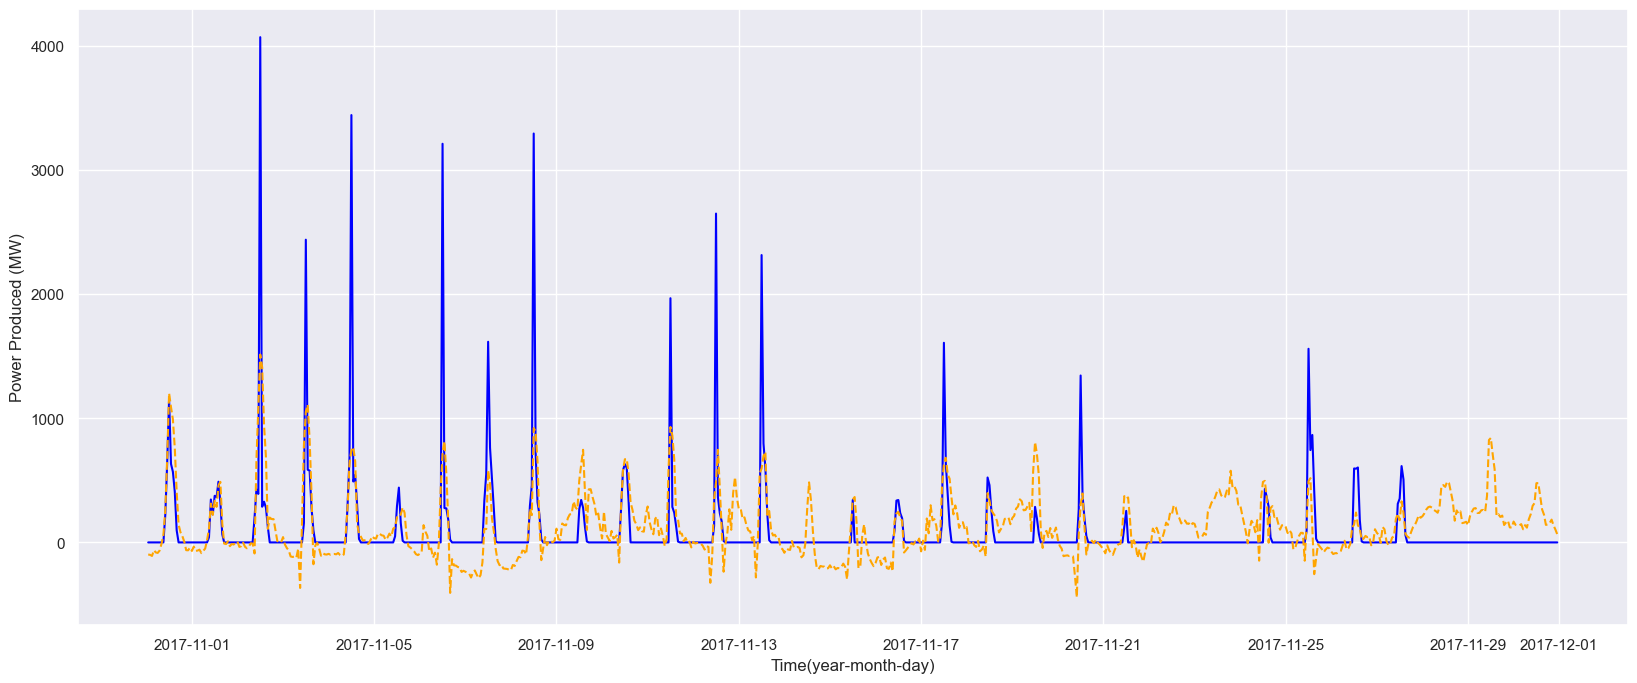

In [147]:
# slicing a week of the data set
fm = test_copy.loc[(test_copy['Datetime'] > '2017-10-31') & (test_copy['Datetime'] < '2017-12-01')]


# Plotting

sns.set()
plt.figure(figsize=(20, 8))
sns.lineplot(data = fm, x = fm['Datetime'], y='SystemProduction', color = 'blue') # actual values
sns.lineplot(data = fm, x = fm['Datetime'], y = 'predictions', color = 'orange', linestyle = 'dashed') # predicted values
plt.ylabel('Power Produced (MW)')
plt.xlabel('Time(year-month-day)')
plt.show()